In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

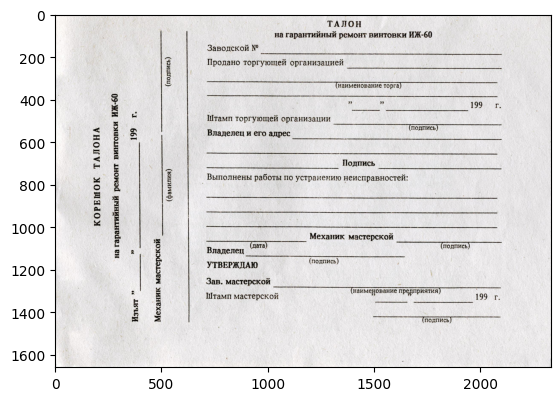

In [31]:
# image=cv2.imread(r'D:\WORKS\TechTasks\Test.jpg')
image =plt.imread(r'Doc.jpg')
plt.imshow(image)

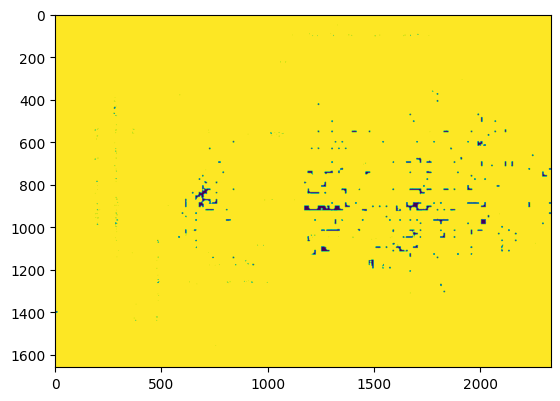

In [32]:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load image, convert to HSV format, define lower/upper ranges, and perform
# color segmentation to create a binary mask
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([0, 0, 218])
upper = np.array([157, 54, 255])
mask = cv2.inRange(hsv, lower, upper)

# Create horizontal kernel and dilate to connect text characters
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilate = cv2.dilate(mask, kernel, iterations=5)
# dilate = mask.copy()
plt.imshow(dilate)

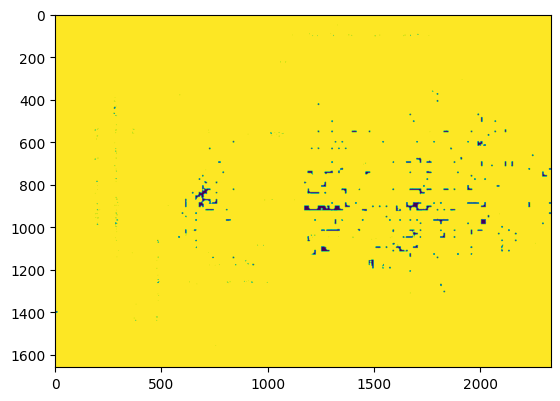

In [33]:
# Find contours and filter using aspect ratio
# Remove non-text contours by filling in the contour
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(dilate)


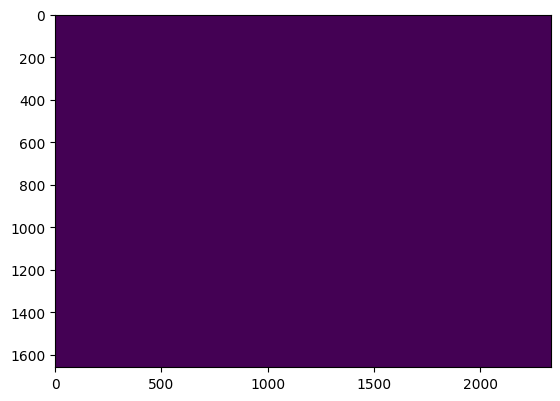

In [34]:
contours = contours[0] if len(contours) == 2 else contours[1]
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w / float(h) < 5:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)
plt.imshow(dilate)


In [35]:

# Bitwise dilated image with mask, invert, then OCR
result = 255 - cv2.bitwise_and(dilate, mask)
data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

cv2.imshow('mask', mask)
cv2.imshow('dilate', dilate)
cv2.imshow('result', result)
cv2.waitKey()

-1

In [ ]:
# Next
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
image = cv2.imread('1.jpg')

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [30]:
import cv2


def captch_ex(file_name):
    img = cv2.imread(file_name)

    img_final = cv2.imread(file_name)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(
        image_final, 180, 255, cv2.THRESH_BINARY
    )  # for black text , cv.THRESH_BINARY_INV
    """
            line  8 to 12  : Remove noisy portion
    """
    kernel = cv2.getStructuringElement(
        cv2.MORPH_CROSS, (10, 10)
    )  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(
        new_img, kernel, iterations=9
    )  # dilate , more the iteration more the dilation

    contours, hierarchy = cv2.findContours(
        dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )  # findContours returns 3 variables for getting contours

    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 3 and h < 3:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

        """
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg'
        cv2.imwrite(s , cropped)
        index = index + 1

        """
    # write original image with added contours to disk
    cv2.imshow("captcha_result", img)
    cv2.waitKey()


file_name = r"D:\WORKS\TechTasks\Doc.jpg"
captch_ex(file_name)

In [25]:
a= cv2.imread(r'D:\WORKS\TechTasks\Doc.jpg')
b = plt.imread(r'D:\WORKS\TechTasks\Test.jpg')

In [26]:
a.shape

(1659, 2334, 3)

# Easy OCR

In [6]:
import cv2
cv2.__version__

'4.10.0'

In [1]:
import easyocr

In [15]:
reader = easyocr.Reader(lang_list=['ru'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
result = reader.readtext(r'Doc.jpg',rotation_info=[90, 180 ,270])

In [19]:
result

[([[1275, 20], [1448, 20], [1448, 70], [1275, 70]],
  'ТАЛОН',
  0.9999826735774087),
 ([[1077, 74], [1782, 74], [1782, 126], [1077, 126]], '1', 0.9709918223264289),
 ([[1030, 84], [1078, 84], [1078, 116], [1030, 116]],
  'на',
  0.9999960381985386),
 ([[711, 137], [964, 137], [964, 185], [711, 185]], '1', 0.9998436035275517),
 ([[706, 202], [1364, 202], [1364, 259], [706, 259]], '1', 0.9563523492493573),
 ([[518, 210], [550, 210], [550, 346], [518, 346]],
  '(подпись',
  0.999928728627132),
 ([[1540, 321], [1627, 321], [1627, 360], [1540, 360]],
  'торга)',
  0.9972965055600117),
 ([[1328, 324], [1540, 324], [1540, 350], [1328, 350]],
  'наименование',
  0.9999937024508235),
 ([[258, 366], [300, 366], [300, 488], [258, 488]],
  'ИЖ-60',
  0.9923987139356879),
 ([[1949, 405], [2017, 405], [2017, 449], [1949, 449]],
  '66[',
  0.9013620563709666),
 ([[360, 458], [388, 458], [388, 492], [360, 492]], 'я', 0.7472514024634656),
 ([[710, 467], [1304, 467], [1304, 521], [710, 521]], '1', 0.98

In [20]:
for i in result:
    print(i[1])

ТАЛОН
1
на
1
1
(подпись
торга)
наименование
ИЖ-60
66[
я
1
тАлоовки
подпись
661
Владелец и его адрес
Подпись
ремонт
(фамилия
Выполнены работы по устранению неисправностей:
КОРЕШОК
гарантийный
Механик мастерской
1
(дата)
подпись
Владелец
на
подпись)
УТВЕРЖДАЮ
Зав: мастерской
Мсхяник
наименование предприятия)
~
Штамп мастерской
199
7
подпись
